**[Introduction to Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**

---


In [1]:
# Code you have previously used to load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv(r'C:\Users\lohani\Desktop\train_v9rqX0R.csv')
test = pd.read_csv(r'C:\Users\lohani\Desktop\test_AbJTz2l.csv')

In [3]:
display(train, test)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
all_data = pd.concat([train, test], axis=0, copy=True)

In [6]:
all_data.shape

(14204, 12)

EDA

C:\Users\lohani\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lohani\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


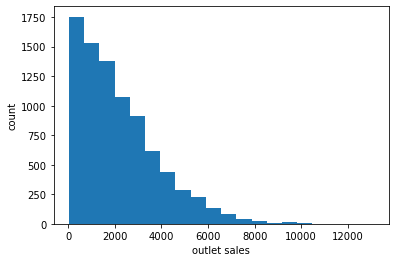

In [7]:
# Make the histogram
_ = plt.hist(all_data['Item_Outlet_Sales'], bins=20)
# Label axes
_ = plt.xlabel('outlet sales')
_ = plt.ylabel('count')
# Show the plot
plt.show()


as it is positively skewed can been seen clearly we need some data transformation to treat this 

# now we will do EDA of numerical data to gain insight of how is the distribution of each

In [8]:
display('Item_Weight-', all_data['Item_Weight'].nunique(), 'Item_Visibility',
        all_data['Item_Visibility'].nunique(), 'Item_MRP', all_data['Item_MRP'].nunique(), 'Year',
        all_data['Outlet_Establishment_Year'].nunique(), 'Item_Fat_Content', all_data['Item_Fat_Content'].nunique(),
        'Item_Type', all_data['Item_Type'].nunique(), 'Item_Identifier', all_data['Item_Identifier'].nunique())

'Item_Weight-'

415

'Item_Visibility'

13006

'Item_MRP'

8052

'Year'

9

'Item_Fat_Content'

5

'Item_Type'

16

'Item_Identifier'

1559

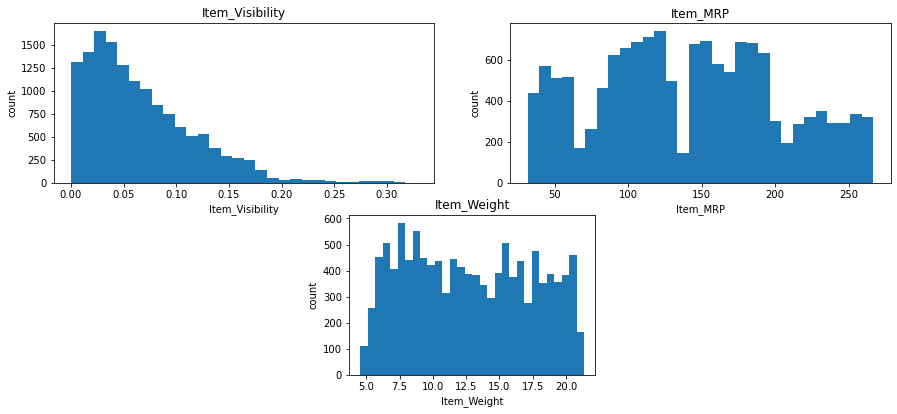

In [9]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(335)
#plt.figure(figsize=(5,2))
ax1.hist(all_data['Item_Visibility'], bins=30)
ax1.set_title('Item_Visibility')
ax1.set_xlabel('Item_Visibility')
ax1.set_ylabel('count')
#plt.figure(figsize=(10,2))
ax2.hist(all_data['Item_MRP'], bins=30)
ax2.set_title('Item_MRP')
ax2.set_xlabel('Item_MRP')
ax2.set_ylabel('count')
# Make the histogram
#plt.figure(figsize=(10,2))
ax3.hist(all_data['Item_Weight'], bins=30)
ax3.set_title('Item_Weight')
# Label axes
ax3 = plt.xlabel('Item_Weight')
ax3 = plt.ylabel('count')
# Show the plot
plt.show()

there is clearly no cut pattern in item_mrp
there is right skewed pattern in item visibility
and no clear cut pattern in item weight 

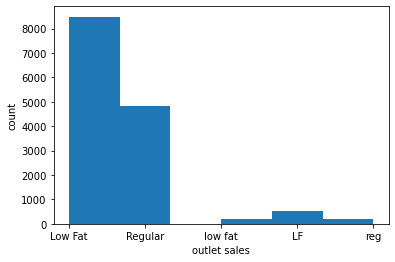

In [10]:
# Make the histogram
_ = plt.hist(all_data['Item_Fat_Content'], bins=6
            )
# Label axes
_ = plt.xlabel('outlet sales')
_ = plt.ylabel('count')
# Show the plot
plt.show()

here we can see clearly LF and Lowfat is same as well as reg and regular is same.
we will combine these two

In [11]:
all_data['Item_Fat_Content'] = all_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat' : 'Low Fat', 'reg':'Regular'})

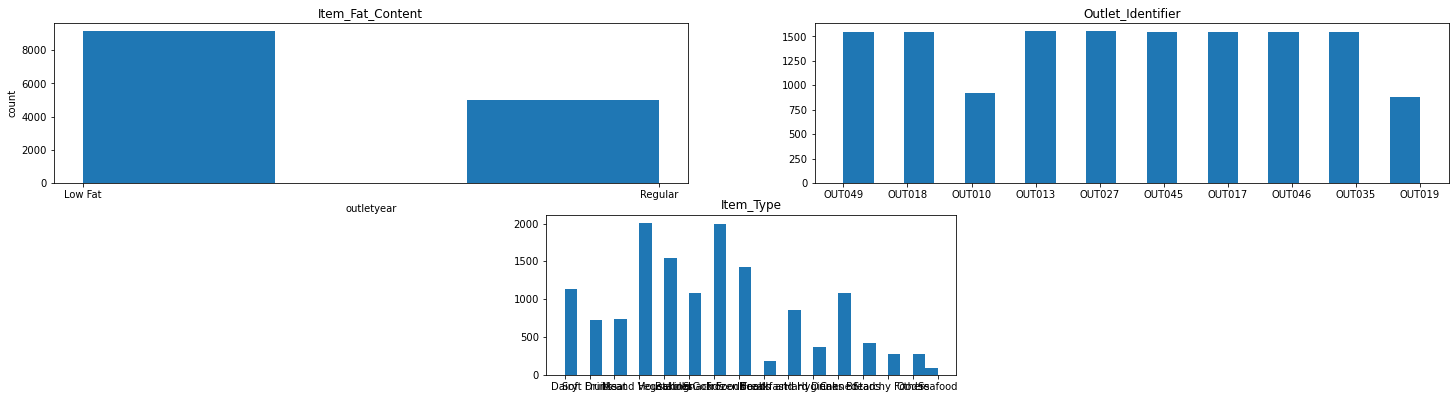

In [12]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(335)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(321)
#plt.figure(figsize=(5,2))
ax1.hist(all_data['Item_Type'], bins=30)
ax1.set_title('Item_Type')
ax1 = plt.xlabel('outlet location type')
ax1 = plt.ylabel('count')
#plt.figure(figsize=(10,2))
ax2.hist(all_data['Outlet_Identifier'], bins=19)
ax2.set_title('Outlet_Identifier')
ax2 = plt.xlabel('outlet type')
ax2 = plt.ylabel('count')
# Make the histogram
#plt.figure(figsize=(10,2))
ax3.hist(all_data['Item_Fat_Content'], bins=3)
ax3.set_title('Item_Fat_Content')
# Label axes
ax3 = plt.xlabel('outletyear')
ax3 = plt.ylabel('count')
# Show the plot
plt.show()

In [13]:
display(all_data['Outlet_Size'].unique(), all_data['Outlet_Location_Type'].unique(), all_data['Outlet_Type'].unique())

array(['Medium', nan, 'High', 'Small'], dtype=object)

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

#we have null values in outlet size 

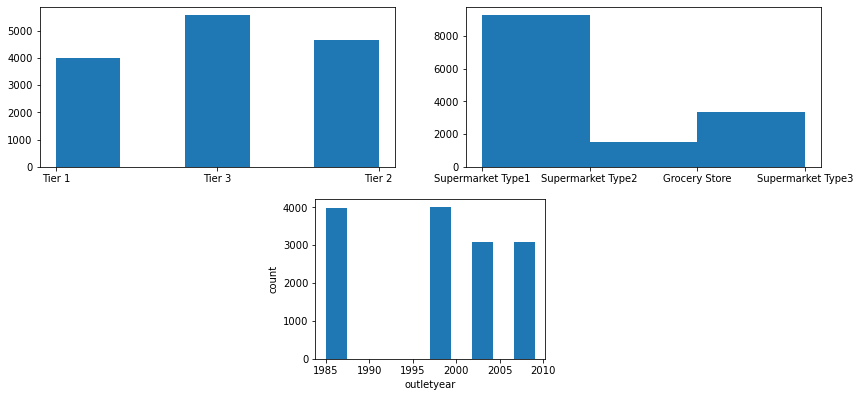

In [14]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(335)
#plt.figure(figsize=(5,2))
ax1.hist(all_data['Outlet_Location_Type'], bins=5)
ax1 = plt.xlabel('outlet location type')
ax1 = plt.ylabel('count')
#plt.figure(figsize=(10,2))
ax2.hist(all_data['Outlet_Type'], bins=3)
ax2 = plt.xlabel('outlet type')
ax2 = plt.ylabel('count')
# Make the histogram
#plt.figure(figsize=(10,2))
ax3.hist(all_data['Outlet_Establishment_Year'])
# Label axes
ax3 = plt.xlabel('outletyear')
ax3 = plt.ylabel('count')
# Show the plot
plt.show()

# bivariate analysis 

In [15]:
y = train.Item_Outlet_Sales

In [16]:
train = train.drop('Item_Outlet_Sales', axis=1)

In [17]:
all_data = all_data.drop('Item_Outlet_Sales', axis=1)


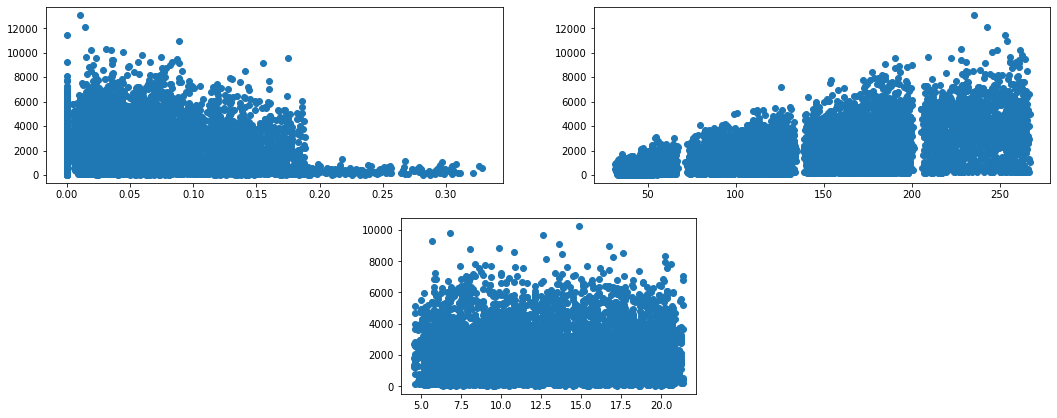

In [18]:
fig = plt.figure(figsize=(18,11))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(335)
ax1.scatter(train['Item_Visibility'], y)
ax2.scatter(train['Item_MRP'], y)
ax3.scatter(train['Item_Weight'], y)
plt.show()


# missing value

In [19]:
# % missing values

def missing(df):

    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

display(missing(all_data))


,Total,Percent
Outlet_Size,4016,28.27
Item_Weight,2439,17.17


In [20]:
display(all_data.groupby(all_data['Outlet_Size']).count())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Outlet_Size,,,,,,,,,,
High,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553
Medium,4655,3096,4655,4655,4655,4655,4655,4655,4655,4655
Small,3980,3100,3980,3980,3980,3980,3980,3980,3980,3980


In [21]:
#here i am filling mode in outlet size we can also fill small as if we plot violin plot distribution will be same 
#but to keep it simple i am imputing mode 

all_data['Outlet_Size'] = all_data['Outlet_Size'].fillna(all_data['Outlet_Size'].mode()[0])
all_data['Item_Weight'] = all_data['Item_Weight'].fillna(all_data['Item_Weight'].mean())


In [22]:
#as we observed earlier that item visibility = 0 was shown in data 
#which is not possible so, we are also removing that data 0 with mean value 
display(all_data.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.234226,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,9.300000,0.027036,94.012000,1987.000000
50%,12.792854,0.054021,142.247000,1999.000000
75%,16.000000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [23]:
all_data['Item_Visibility'] = all_data['Item_Visibility'].replace({0:0.065953})

**FEATURES enginering**

In [24]:
display(all_data['Item_Type'].unique(),all_data['Outlet_Identifier'].unique())

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [25]:
#display(all_data.groupby(all_data['Item_Type']).count())

In [26]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
all_data['Item_Fat_Content']= le.fit_transform(all_data['Item_Fat_Content'])
all_data['Outlet_Size']= le.fit_transform(all_data['Outlet_Size'])
all_data['Outlet_Location_Type']= le.fit_transform(all_data['Outlet_Location_Type'])
all_data['Outlet_Type']= le.fit_transform(all_data['Outlet_Type'])
all_data['Item_Type']= le.fit_transform(all_data['Item_Type'])
all_data['Outlet_Identifier']= le.fit_transform(all_data['Outlet_Identifier'])


In [27]:
all_data = all_data.set_index('Item_Identifier')

In [28]:
all_data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.353351,0.070034,7.229372,141.004977,4.722473,1997.830681,1.170867,1.112856,1.201281
std,4.234226,0.478027,0.048602,4.213471,62.086938,2.837101,8.371664,0.600306,0.812755,0.796543
min,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,9.300000,0.000000,0.033143,4.000000,94.012000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,12.792854,0.000000,0.062347,6.000000,142.247000,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


# Data preprocessing 

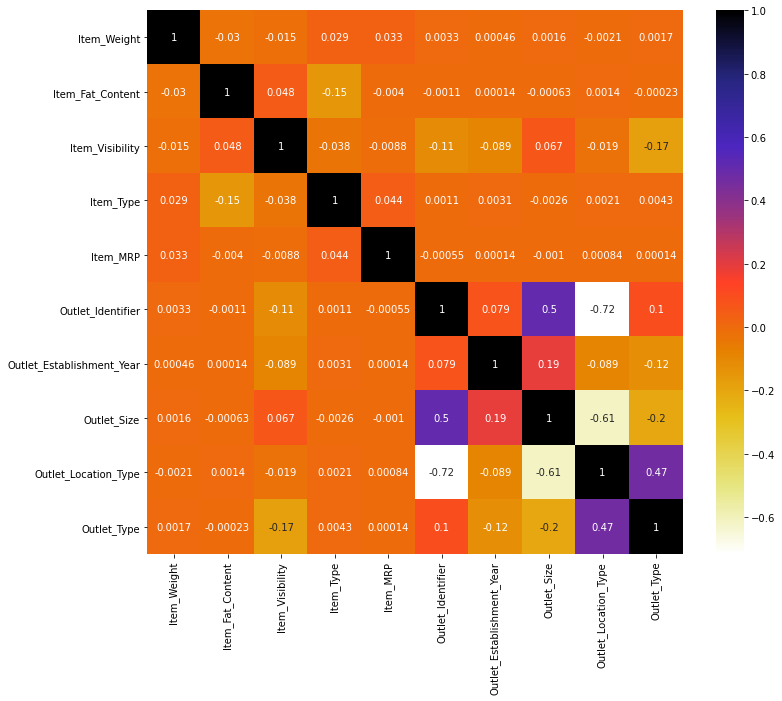

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = all_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(all_data)


In [31]:
all_data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.353351,0.070034,7.229372,141.004977,4.722473,1997.830681,1.170867,1.112856,1.201281
std,4.234226,0.478027,0.048602,4.213471,62.086938,2.837101,8.371664,0.600306,0.812755,0.796543
min,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,9.300000,0.000000,0.033143,4.000000,94.012000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,12.792854,0.000000,0.062347,6.000000,142.247000,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,1.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [32]:
train, test = train_test_split(all_data, test_size=0.3999577,random_state=27)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train, y,test_size=0.2,random_state=27)

In [34]:
from sklearn.metrics import mean_absolute_error



## Model Building, Prediction and Evaluation

In [35]:
# model 
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
    #Fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_absolute_error(y_pred, y_test)

1345.3566671410963

# TEST

In [36]:
#Preprocessing of test data and fitting model
test_predictions = lr.predict(test)


In [37]:
test_predictions

array([2230.5881073 , 2193.43627059, 2091.5235562 , ..., 2222.1302956 ,
       2174.30798536, 2128.89914783])

In [38]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDT44,16.600000,0,0.102967,6,118.8466,6,2004,2,1,1
FDC50,15.850000,0,0.136498,3,96.3094,8,1997,2,0,1
FDE52,10.395000,1,0.029862,4,86.6514,1,1987,0,2,1
DRH59,10.800000,0,0.058764,7,72.2380,2,2007,1,1,1
FDU32,8.785000,0,0.026073,6,121.4414,3,2009,1,2,2
...,...,...,...,...,...,...,...,...,...,...
FDD40,12.792854,1,0.014722,4,193.6162,5,1985,1,2,3
FDD20,14.150000,0,0.020757,6,123.9046,7,2002,1,1,1
FDS48,15.150000,0,0.065953,0,150.4708,7,2002,1,1,1


In [39]:
test1 = le.inverse_transform(test.Outlet_Identifier)

In [55]:
#output11 = pd.DataFrame({'Item_Identifier': test1}) 

In [57]:
#output11.nunique()

Item_Identifier    10
dtype: int64

In [50]:
#Save test predictions to file
output = pd.DataFrame({'Item_Identifier': test.index, 'Outlet_Identifier': test1,
                       'Item_Outlet_Sales': test_predictions})

In [51]:
output

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDT44,OUT035,2230.588107
1,FDC50,OUT046,2193.436271
2,FDE52,OUT013,2091.523556
3,DRH59,OUT017,2198.297561
4,FDU32,OUT018,2212.109801
...,...,...,...
5676,FDD40,OUT027,2103.193196
5677,FDD20,OUT045,2188.335701
5678,FDS48,OUT045,2222.130296
5679,FDI41,OUT046,2174.307985


In [44]:
output = output.set_index('Item_Identifier')

In [52]:
# Exporting results

output.to_csv(r'C:\Users\lohani\Desktop\lrsales12.csv', index=False)